## Zoning Board of Appeal Tracker Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
data = pd.read_csv("../data/zoning_data.csv")
# Display the first few rows of the data to get an overview
data.head()

,address,status,parent_apno,boa_apno,appeal_type,contact,submitted_date,received_date,hearing_date,ever_deferred,num_deferrals,final_decision_date,decision,closed_date,city,zip,ward,zoning_district,project_description
0,261 Princeton ST East Boston 02128,Community Process,ERT1474884,BOA1540166,Building,Jeffrey Drago,2023-10-30,2023-10-30,NaN,NaN,NaN,NaN,NaN,NaN,East Boston,2128,1,East Boston Neighborhood,To raze existing structure under SF erect new ...
1,261 Princeton ST East Boston 02128,Hearing Scheduled,ERT1474884,BOA1540041,Zoning,Jeffrey Drago,2023-10-30,2023-10-30,2023-12-12,N,0.0,NaN,NaN,NaN,East Boston,2128,1,East Boston Neighborhood,To raze existing structure under SF erect new ...
2,960 Centre ST Jamaica Plain 02130,Community Process,ALT1526998,BOA1540123,Building,Joshua LaPan,2023-10-30,2023-10-30,NaN,NaN,NaN,NaN,NaN,NaN,Jamaica Plain,2130,19,Jamaica Plain Neighborhood,In connection with ERT1466929 two dwellings on...
3,34 Mildred AV Mattapan 02126,Hearing Scheduled,ALT1526568,BOA1540077,Zoning,Matthew Eckel,2023-10-30,2023-10-30,2023-12-12,N,0.0,NaN,NaN,NaN,Mattapan,2126,18,Greater Mattapan Neighborhood,To consolidate Parcel ID 1800806000 amp 180080...
4,27 Colonial AVE Dorchester 02124,Community Process,ALT1441281,BOA1539847,Zoning,Ian Wade,2023-10-28,2023-10-30,NaN,NaN,NaN,NaN,NaN,NaN,Dorchester,2124,17,Dorchester Neighborhood,Change occupancy from Three Family to FOUR Add...


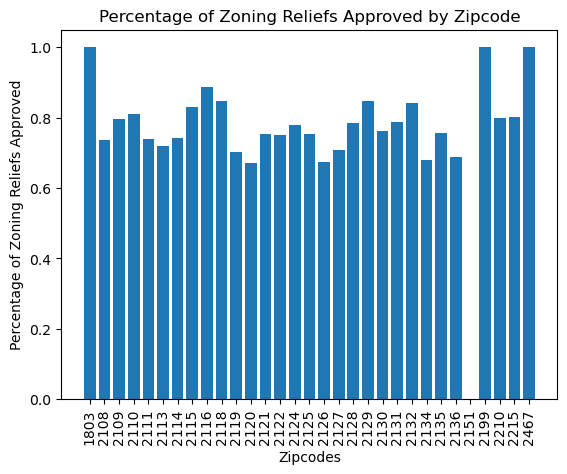

In [4]:
zipcodes = {}
zipcodes_approved = {}
x_zip = []
for i in range(len(data)):
    if (data['zip'][i] not in zipcodes_approved) and ((data['decision'][i] == 'AppProv') or (data['decision'][i] == 'Approved')):
        zipcodes_approved[data['zip'][i]] = 1
    elif (data['zip'][i] not in zipcodes_approved):
        zipcodes_approved[data['zip'][i]] = 0
    else:
        if ((data['decision'][i] == 'AppProv') or (data['decision'][i] == 'Approved')):
            count = zipcodes_approved[data['zip'][i]] + 1
            zipcodes_approved[data['zip'][i]] = count
        
    if (data['zip'][i] not in zipcodes):
        zipcodes[data['zip'][i]] = 1
        x_zip.append(data['zip'][i])
    else:
        count = zipcodes[data['zip'][i]] + 1
        zipcodes[data['zip'][i]] = count
sorted_x_zip = [str(value) for value in sorted(x_zip)]
approve = {}

for key in zipcodes:
    if key in zipcodes_approved:
        approve[key] = round(zipcodes_approved[key]/zipcodes[key], 3)
sorted_approve = {k: approve[k] for k in sorted(approve)}
y = [val for val in sorted_approve.values()]
plt.bar(sorted_x_zip, y)
plt.xticks(rotation=90)
plt.xlabel('Zipcodes')
plt.ylabel('Percentage of Zoning Reliefs Approved')
plt.title('Percentage of Zoning Reliefs Approved by Zipcode')
plt.show()

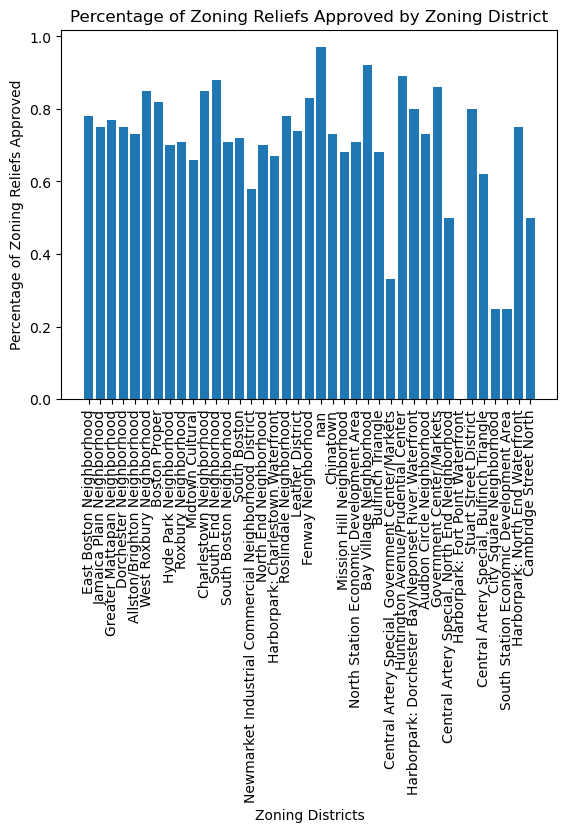

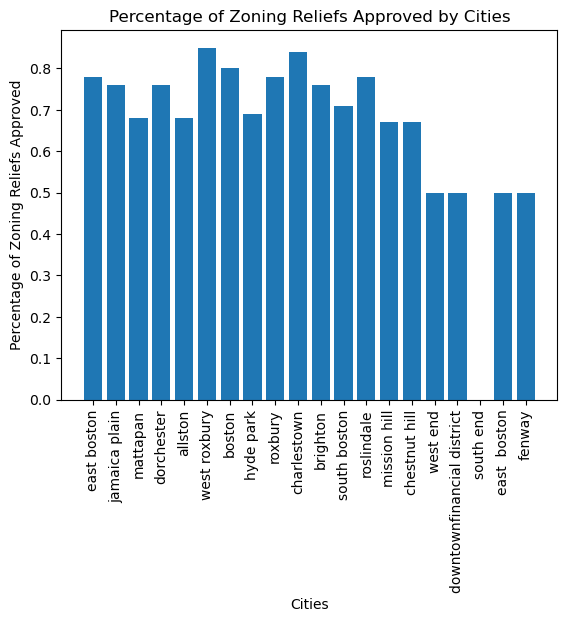

In [90]:
zoning_districts = []
zoning_dict = {}
zoning_dict_total = {}
cities = []
city_dict = {}
city_dict_total = {}
data['city'] = [city.lower().replace('/', '') for city in data['city']]


for i in range(len(data)):
    if data['zoning_district'][i] not in zoning_districts:
        #get all zoning districts
        if pd.isna(data['zoning_district'][i]) and 'nan' not in zoning_districts:
            zoning_districts.append('nan')
            zoning_dict['nan'] = 0
            zoning_dict_total['nan'] = 1
        else:
            if pd.isna(data['zoning_district'][i]):
                continue
            else:
                zoning_districts.append(data['zoning_district'][i])
                zoning_dict[data['zoning_district'][i]] = 0
                zoning_dict_total[data['zoning_district'][i]] = 1
for i in range(len(data)):
    #data['city'][i] = data['city'][i].lower()
    #if data['city'][i][-1] == '/':
    #    data['city'][i] = data['city'][i][:-1]
    if data['city'][i] not in cities:
        #get all cities
        #print(data['city'][i])
        cities.append(data['city'][i])
        city_dict[data['city'][i]] = 0
        city_dict_total[data['city'][i]] = 1
#print(data['city'][2071])
for i in range(len(data)):
    if pd.isna(data['zoning_district'][i]) and (data['decision'][i] == 'Approved' or data['decision'][i] == 'AppProv'):
        zoning_dict['nan'] = zoning_dict['nan'] + 1
        zoning_dict_total['nan'] = zoning_dict_total['nan'] + 1
    elif pd.isna(data['zoning_district'][i]):
        continue
    elif data['zoning_district'][i] in zoning_districts and (data['decision'][i] == 'Approved' or data['decision'][i] == 'AppProv'):
        zoning_dict[data['zoning_district'][i]] = zoning_dict[data['zoning_district'][i]] + 1
        zoning_dict_total[data['zoning_district'][i]] = zoning_dict_total[data['zoning_district'][i]] + 1
    else:
        zoning_dict_total[data['zoning_district'][i]] = zoning_dict_total[data['zoning_district'][i]] + 1
        
    if data['city'][i] in cities and (data['decision'][i] == 'Approved' or data['decision'][i] == 'AppProv'):
        city_dict_total[data['city'][i]] = city_dict_total[data['city'][i]] + 1
        city_dict[data['city'][i]] = city_dict[data['city'][i]] + 1
    else:
        city_dict_total[data['city'][i]] = city_dict_total[data['city'][i]] + 1

zoning_app = []
city_app = []
for i in zoning_dict_total:
    zoning_app.append(round(zoning_dict[i]/zoning_dict_total[i], 2))
    
for i in city_dict_total:
    city_app.append(round(city_dict[i]/city_dict_total[i], 2))
plt.bar(zoning_districts, zoning_app)
plt.xticks(rotation=90)
plt.xlabel('Zoning Districts')
plt.ylabel('Percentage of Zoning Reliefs Approved')
plt.title('Percentage of Zoning Reliefs Approved by Zoning District')
plt.show()

plt.bar(cities, city_app)
plt.xticks(rotation=90)
plt.xlabel('Cities')
plt.ylabel('Percentage of Zoning Reliefs Approved')
plt.title('Percentage of Zoning Reliefs Approved by Cities')
plt.show()

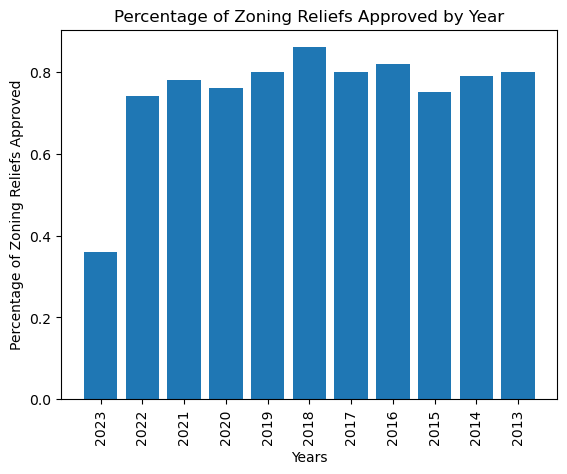

In [6]:
dates = []
dates_total = {}
dates_count = {}
for i in range(len(data)):
    if data['submitted_date'][i][0:4] not in dates:
        dates.append(data['submitted_date'][i][0:4])
        dates_total[data['submitted_date'][i][0:4]] = 0
        dates_count[data['submitted_date'][i][0:4]] = 0
for i in range(len(data)):
    if data['decision'][i] == 'Approved' or data['decision'][i] == 'AppProv':
        dates_total[data['submitted_date'][i][0:4]] = dates_total[data['submitted_date'][i][0:4]] + 1
        dates_count[data['submitted_date'][i][0:4]] = dates_count[data['submitted_date'][i][0:4]] + 1
    else:
        dates_total[data['submitted_date'][i][0:4]] = dates_total[data['submitted_date'][i][0:4]] + 1

dates_avg = []
for i in dates_total:
    dates_avg.append(round(dates_count[i]/dates_total[i], 2))
    
plt.bar(dates, dates_avg)
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.ylabel('Percentage of Zoning Reliefs Approved')
plt.title('Percentage of Zoning Reliefs Approved by Year')
plt.show()

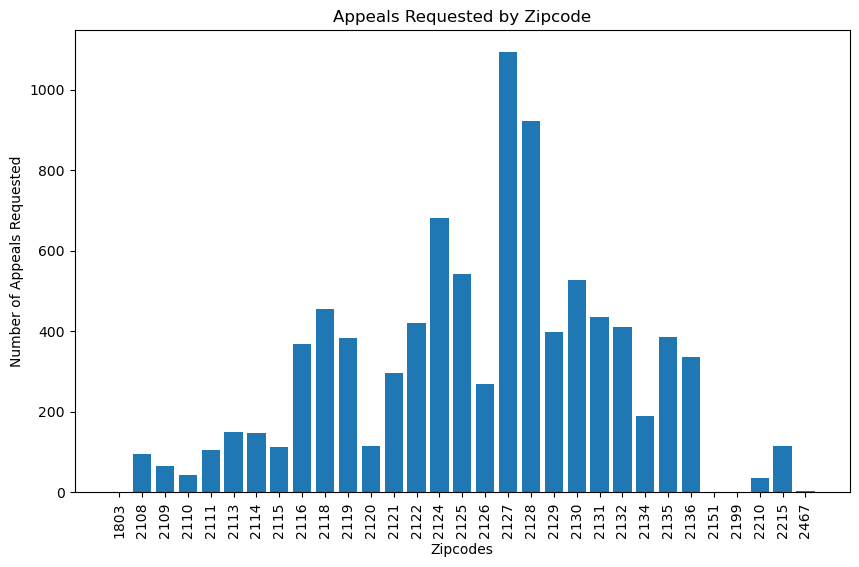

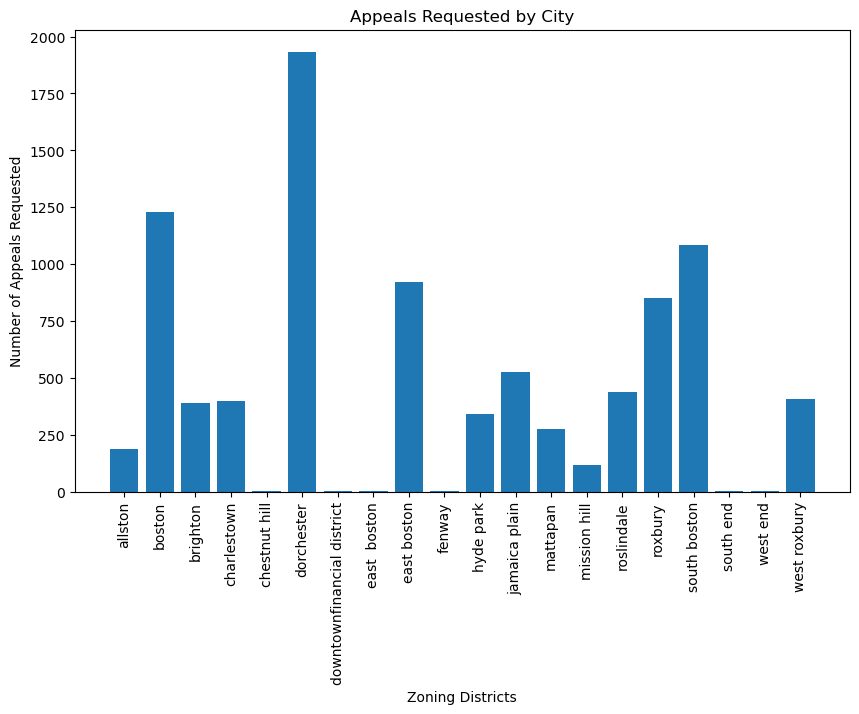

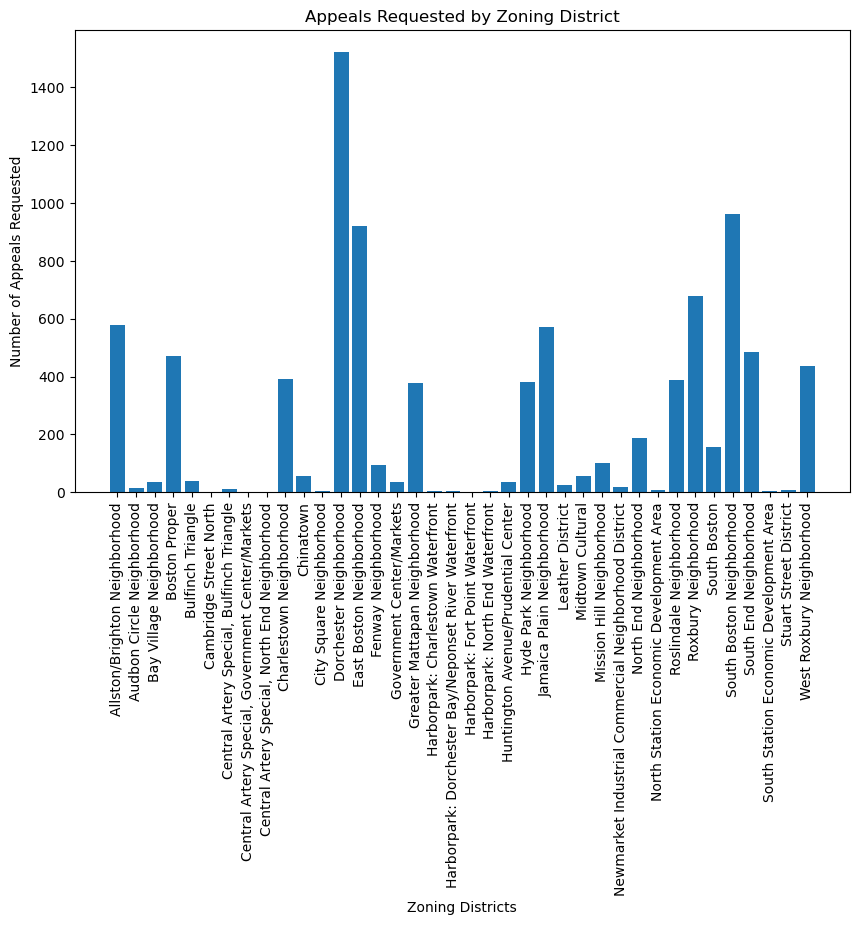

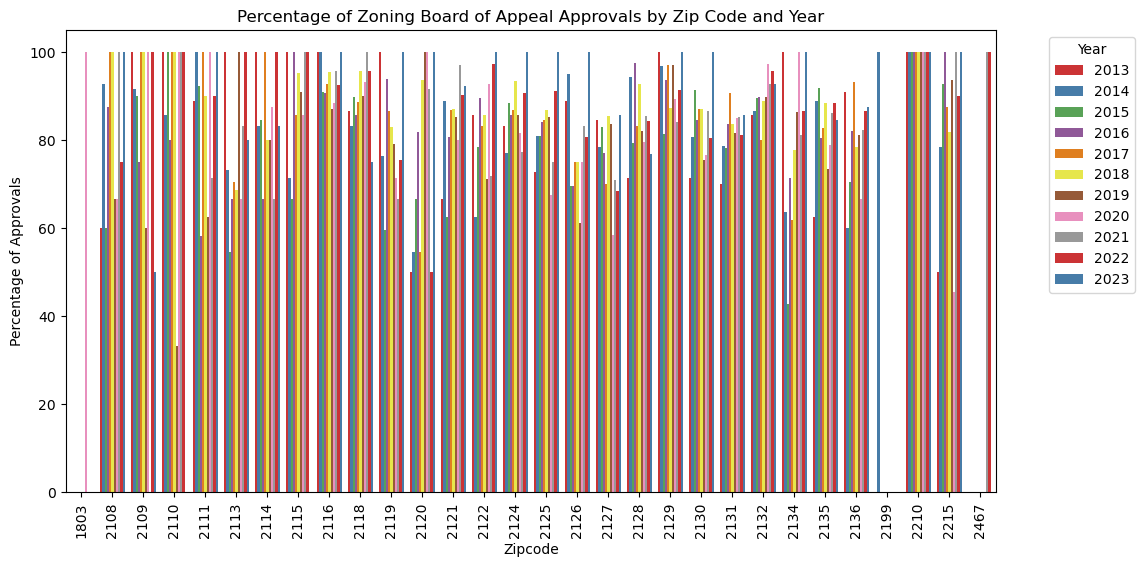

In [106]:
import seaborn as sns

data['city'] = [city.lower().replace('/', '') for city in data['city']]

#Who is applying for building permits by geography (neighborhood, zip code, zoning district)?
building_permits = data[data['appeal_type'] == 'Building']#only data where appeal type is building
zoning_permits = data[data['appeal_type'] == 'Zoning'] #only data where appeal type is zoning
building_by_zip = data.groupby('zip').size().reset_index(name='count')
plt.figure(figsize=(10, 6))
plt.bar(building_by_zip['zip'].astype(str), building_by_zip['count'])
plt.xlabel('Zipcodes')
plt.ylabel('Number of Appeals Requested')
plt.title('Appeals Requested by Zipcode')
plt.xticks(rotation=90)
plt.show()
#print(building_by_zip)

building_by_city = data.groupby('city').size().reset_index(name='count')
#building_permits['city'] = building_permits['city'].str.lower()
plt.figure(figsize=(10, 6))
plt.bar(building_by_city['city'].astype(str), building_by_city['count'])
plt.xlabel('Zoning Districts')
plt.ylabel('Number of Appeals Requested')
plt.title('Appeals Requested by City')
plt.xticks(rotation=90)
plt.show()

building_by_z = data.groupby('zoning_district').size().reset_index(name='count')
plt.figure(figsize=(10, 6))
plt.bar(building_by_z['zoning_district'].astype(str), building_by_z['count'])
plt.xlabel('Zoning Districts')
plt.ylabel('Number of Appeals Requested')
plt.title('Appeals Requested by Zoning District')
plt.xticks(rotation=90)
plt.show()

#What are the year over year trends visible in the zoning board of appeal approvals and denials 
#by geography (neighborhood - listed as city, zip code, zoning district)? 
data['year'] = data['submitted_date'].str.split('-').str[0]
unique_years = data['year'].unique() #unique years of data
 
data['zipcode'] = data['zip']
unique_zip = data['zipcode'].unique() #unique zipcodes
#print(unique_zip)

data['cities'] = data['city']
unique_cities = data['cities'].unique()
unique_cities = [city.lower().replace('/', '') for city in unique_cities]
unique_cities = list(set(unique_cities)) #unique cities
#print(unique_cities)

data['zoning_districts'] = data['zoning_district']
unique_zd = data['zoning_districts'].unique() #unique zoning districts

#approved = data[(data['decision'] == 'Approved') | (data['decision'] == 'AppProv')] #rows where request was approved

grouped = data.groupby(['year', 'zip', 'decision']).size().unstack(fill_value=0).reset_index()
grouped['total'] = grouped['Approved'] + grouped['AppProv'] + grouped['Denied'] + grouped['DeniedPrej'] + grouped['Withdrawn']
grouped['approval_percent'] = ((grouped['Approved']+grouped['AppProv'])/grouped['total'])*100

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='zip', y='approval_percent', hue='year', palette='Set1')
plt.title('Percentage of Zoning Board of Appeal Approvals by Zip Code and Year')
plt.xticks(rotation=90)
plt.xlabel('Zipcode')
plt.ylabel('Percentage of Approvals')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()



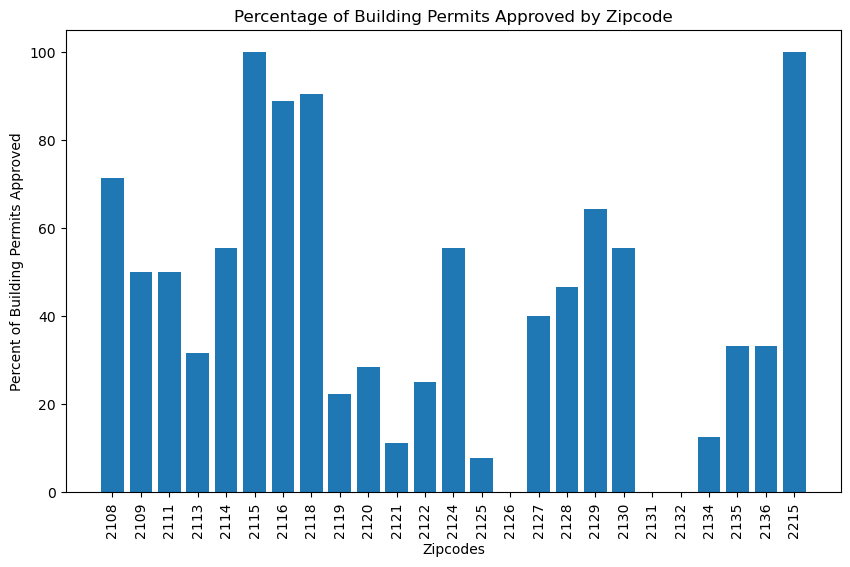

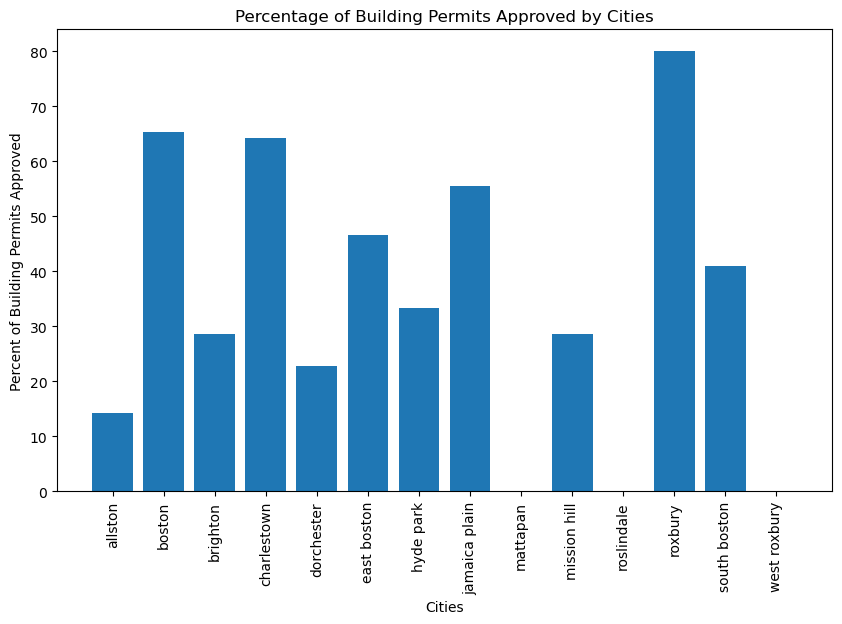

In [88]:
building_by_zip_app = building_permits.groupby('zip')['decision'].value_counts(normalize=True).unstack(fill_value=0).reset_index()
building_by_zip_app['app_percent'] = (building_by_zip_app['Approved'] + building_by_zip_app['AppProv']) * 100
plt.figure(figsize=(10, 6))
plt.bar(building_by_zip_app['zip'].astype(str), building_by_zip_app['app_percent'])
plt.xlabel('Zipcodes')
plt.ylabel('Percent of Building Permits Approved')
plt.title('Percentage of Building Permits Approved by Zipcode')
plt.xticks(rotation=90)
plt.show()
#print(building_by_zip)

building_by_city_app = building_permits.groupby('city')['decision'].value_counts(normalize=True).unstack(fill_value=0).reset_index()
building_by_city_app['app_percent'] = (building_by_city_app['Approved'] + building_by_city_app['AppProv']) * 100
plt.figure(figsize=(10, 6))
plt.bar(building_by_city_app['city'].astype(str), building_by_city_app['app_percent'])
plt.xlabel('Cities')
plt.ylabel('Percent of Building Permits Approved')
plt.title('Percentage of Building Permits Approved by Cities')
plt.xticks(rotation=90)
plt.show()
#print(building_by_zip)

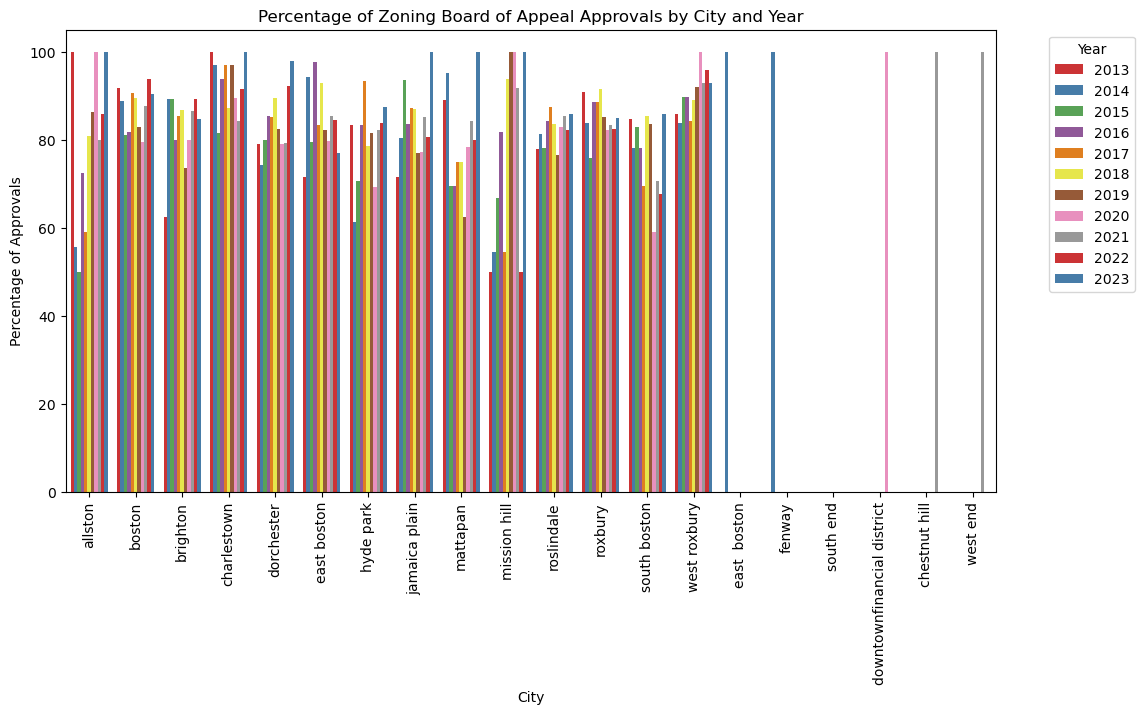

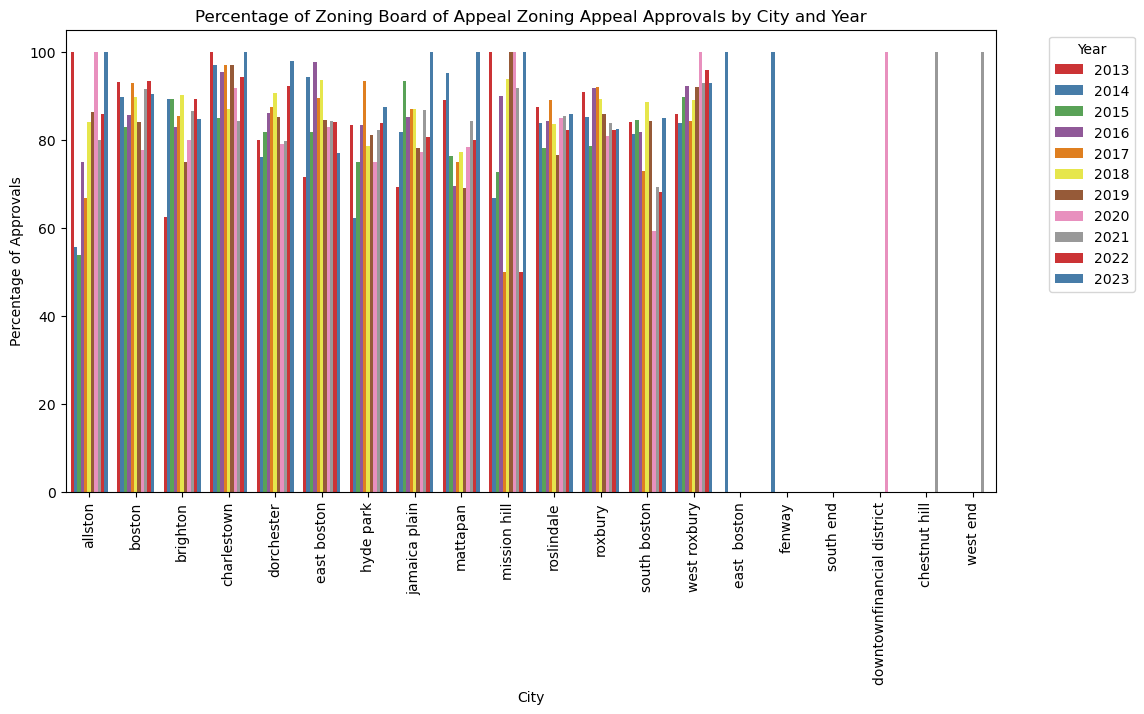

In [107]:
building_permits = data[data['appeal_type'] == 'Building']#only data where appeal type is building

grouped_c = data.groupby(['year', 'city', 'decision']).size().unstack(fill_value=0).reset_index()
grouped_c['total'] = grouped_c['Approved'] + grouped_c['AppProv'] + grouped_c['Denied'] + grouped_c['DeniedPrej'] + grouped_c['Withdrawn']
grouped_c['approval_percent'] = ((grouped_c['Approved']+grouped_c['AppProv'])/grouped_c['total'])*100

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_c, x='city', y='approval_percent', hue='year', palette='Set1')
plt.title('Percentage of Zoning Board of Appeal Approvals by City and Year')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Percentage of Approvals')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()


grouped_c = zoning_permits.groupby(['year', 'city', 'decision']).size().unstack(fill_value=0).reset_index()
grouped_c['total'] = grouped_c['Approved'] + grouped_c['AppProv'] + grouped_c['Denied'] + grouped_c['DeniedPrej'] + grouped_c['Withdrawn']
grouped_c['approval_percent'] = ((grouped_c['Approved']+grouped_c['AppProv'])/grouped_c['total'])*100

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_c, x='city', y='approval_percent', hue='year', palette='Set1')
plt.title('Percentage of Zoning Board of Appeal Zoning Appeal Approvals by City and Year')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Percentage of Approvals')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()